# Lecture 3 - SMILES and RDKit

> Start with the SMILES language, practice tiny steps, then use RDKit to draw, edit, and analyze molecules. Finish with PubChem lookups.


```{contents}
:local:
:depth: 1
```

## Learning goals

- Read SMILES strings with confidence: atoms, bonds, branches, rings, aromaticity, charges, simple stereochemistry.
- Use RDKit to parse SMILES, draw structures, add hydrogens, and compute basic properties.
- Make small edits: replace atoms, neutralize groups, split salts, add a methyl group with a graph edit.
- Query PubChem after you can edit molecules locally, then round-trip to SMILES and files.

[![Colab](https://img.shields.io/badge/Open-Colab-orange)](https://colab.research.google.com/drive/184RYVf-aXx2PfOauFp7xw8LIrqJiiWW6?usp=sharing) 
---


## 1. SMILES

**What is SMILES?**

SMILES (Simplified Molecular Input Line Entry System) is a compact way to describe a molecule using only a line of text. It turns molecular structures into strings that are easy for both humans and computers to read.

Each atom is represented by its atomic symbol: `C` for carbon, `O` for oxygen, etc.

Bonds are shown with symbols: single bonds are implicit, `=` is a double bond, `#` is a triple bond.

Branches are placed in parentheses: `CC(O)C` means a side group on the middle carbon.

Ring structures use numbers to show where the ring closes: `C1CCCCC1` is cyclohexane.

Charges, isotopes, and stereochemistry can also be encoded.

Because it’s text, SMILES is great for storing, comparing, and searching molecules in code and databases. RDKit can take a SMILES string, reconstruct the molecule, and let you visualize or analyze it.

For more information: *J. Chem. Inf. Comput. Sci.* 1988, 28 (1), 31–36 [![Read](https://img.shields.io/badge/Read-Paper-blue)](https://pubs.acs.org/doi/10.1021/ci00057a005)

Now, let's get started!

If you use Colab, run the install cell below first.

In [1]:
# Install only if needed
try:
    import rdkit
    from rdkit import Chem
    from rdkit.Chem import Draw, Descriptors, Crippen, rdMolDescriptors
except Exception:
    %pip install rdkit

### 1.1 Atoms

- Organic set without brackets: `B C N O P S F Cl Br I`.  
- Hydrogens are usually implicit.  
- Charges or unusual valence use brackets.

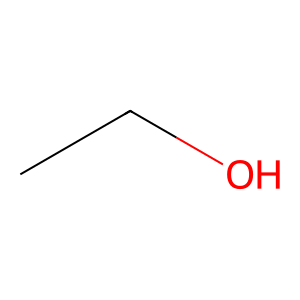

In [2]:
# Plain strings to focus on notation
ethanol = "CCO"         # C-C-O
mol_1 = Chem.MolFromSmiles(ethanol)
Draw.MolToImage(mol_1)

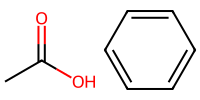

In [3]:
acetic = "CC(=O)O"      # C-C with a double bonded O and an OH
benzene = "c1ccccc1"    # aromatic ring

mol_2 = Chem.MolFromSmiles(acetic)
mol_3 = Chem.MolFromSmiles(benzene)

# Draw both molecules side by side
Draw.MolsToImage([mol_2, mol_3], molsPerRow=2, subImgSize=(100,100))

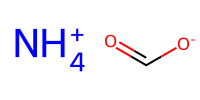

In [4]:
charged1 = "[NH4+]"     # ammonium
charged2 = "C(=O)[O-]"  # carboxylate
mol_c1 = Chem.MolFromSmiles(charged1)
mol_c2 = Chem.MolFromSmiles(charged2)

Draw.MolsToImage([mol_c1, mol_c2], molsPerRow=1, subImgSize=(100,100))


### 1.2 Bonds

- Single is implied.  
- `=` is double.  
- `#` is triple.

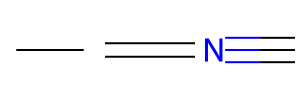

In [5]:
single = "CC"
double = "C=C"
triple = "C#N"

mols = [Chem.MolFromSmiles(bond) for bond in [single, double, triple]]

Draw.MolsToImage(mols, molsPerRow=1, subImgSize=(100,100))



### 1.3 Branches

- Parentheses create side branches.

CC(O)CC CC(C)OC


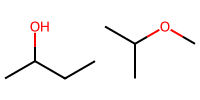

In [6]:
isopropanol_a = "CC(O)CC"
isopropanol_b = "CC(C)OC"    # same structure, different order
print(isopropanol_a, isopropanol_b)

mol_a = Chem.MolFromSmiles(isopropanol_a)
mol_b = Chem.MolFromSmiles(isopropanol_b)

Draw.MolsToImage([mol_a, mol_b], molsPerRow=2, subImgSize=(100,100))



### 1.4 Rings

- Numbers open and close rings.  
- Same digit appears twice to close that ring.

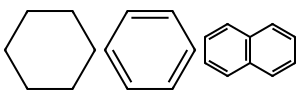

In [7]:
cyclohexane = "C1CCCCC1"
benzene = "c1ccccc1"
naphthalene = "c1cccc2c1cccc2"

mols = [Chem.MolFromSmiles(ring) for ring in [cyclohexane, benzene, naphthalene]]

Draw.MolsToImage(mols, molsPerRow=3, subImgSize=(100,100))


### 1.5 Aromatic vs aliphatic

- Aromatic atoms are lower case.  
- Aliphatic are upper case.

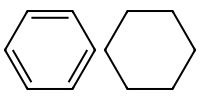

In [8]:
mol_aromatic = Chem.MolFromSmiles("c1ccccc1")
mol_aliphatic = Chem.MolFromSmiles("C1CCCCC1")

Draw.MolsToImage([ mol_aromatic, mol_aliphatic], molsPerRow=3, subImgSize=(100,100))

```{note}
What the digits mean:
A number marks a ring connection. The same digit appears twice on the two atoms that are bonded to each other to close that ring.
For fused systems, you can reuse different digits to show where each ring closes.
```

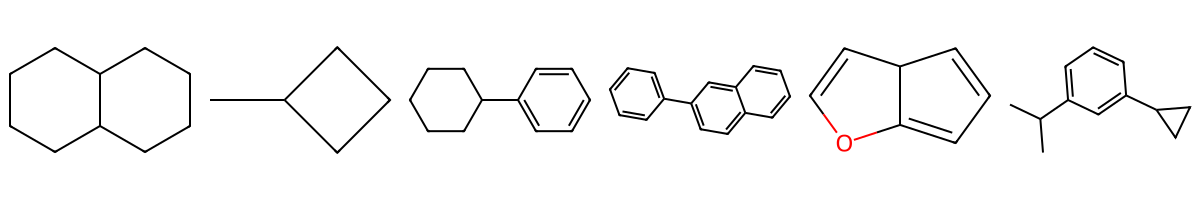

In [9]:
ring1 = Chem.MolFromSmiles("C1CCC2CCCCC2C1")
ring2 = Chem.MolFromSmiles("C1CC(C)C1")
ring3 = Chem.MolFromSmiles("c1ccc(C2CCCCC2)cc1")
ring4 = Chem.MolFromSmiles("c1ccc(-c2ccc3ccccc3c2)cc1")
ring5 = Chem.MolFromSmiles("C1=CC2C=COC2=C1")
ring6 = Chem.MolFromSmiles("CC(C)c1cccc(C2CC2)c1")

Draw.MolsToImage([ring1,ring2, ring3, ring4, ring5, ring6], ubImgSize=(100,100))

### 1.6 Charges and salts

- Use `.` to separate parts in a salt.  
- Place charge in brackets on the atom.

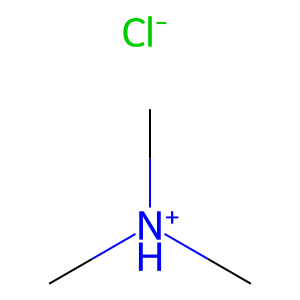

In [10]:
salt = "C[NH+](C)C.[Cl-]"    # trimethylammonium chloride
Draw.MolToImage(Chem.MolFromSmiles(salt ), molsPerRow=1, subImgSize=(100,100))


### 1.7 Simple stereochemistry

- E and Z for alkenes use slashes.  
- `Cl/C=C/Cl` is E. `Cl/C=C\Cl` is Z.

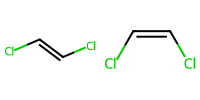

In [11]:

mol_E = Chem.MolFromSmiles("Cl/C=C/Cl")
mol_Z = Chem.MolFromSmiles("Cl/C=C\\Cl")

Draw.MolsToImage([ mol_E, mol_Z], molsPerRow=3, subImgSize=(100,100))



```{admonition} Try
Search online SMILES for these and print them:
- isopropyl alcohol
- benzoate anion
- cyclopropane
- pyridine
```

```{admonition} Try
Search online SMILES for these and print them:
- isopropyl alcohol
- benzoate anion
- cyclopropane
- pyridine
```

---

## 2. RDKit quick start

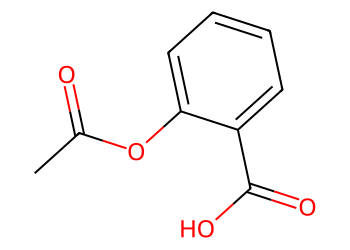

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors, Crippen, rdMolDescriptors

smi = "CC(=O)OC1=CC=CC=C1C(=O)O"  # aspirin
mol = Chem.MolFromSmiles(smi)
Draw.MolToImage(mol, size=(350, 250))

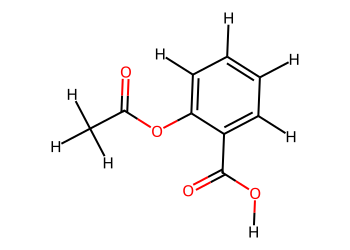

In [13]:
# Add hydrogens for clarity
mol_H = Chem.AddHs(mol)
Draw.MolToImage(mol_H, size=(350, 250))

In [14]:
# Quick properties in one place
mw = Descriptors.MolWt(mol)
logp = Crippen.MolLogP(mol)
hbd = rdMolDescriptors.CalcNumHBD(mol)
hba = rdMolDescriptors.CalcNumHBA(mol)
tpsa = rdMolDescriptors.CalcTPSA(mol)
print("MolWt", round(mw,2), "LogP", round(logp,2), "HBD", hbd, "HBA", hba, "TPSA", round(tpsa,1))

MolWt 180.16 LogP 1.31 HBD 1 HBA 3 TPSA 63.6


```{note}
**MolWt** → The molecular weight (molar mass) of the compound, measured in grams per mole.

**LogP** → The logarithm of the partition coefficient (octanol/water); higher values mean more lipophilic (hydrophobic).

**HBD** (Hydrogen Bond Donors) → Atoms (often OH or NH groups) that can donate a hydrogen in hydrogen bonding.

**HBA** (Hydrogen Bond Acceptors) → Atoms (such as oxygen or nitrogen) that can accept a hydrogen bond.

**TPSA** (Topological Polar Surface Area) → A measure of the molecule’s polar area, correlated with solubility and permeability.
```

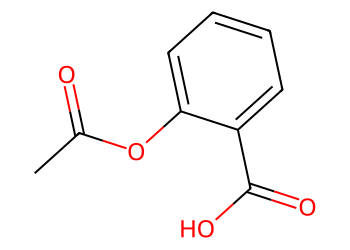

In [15]:
# Show atom numbers to plan edits
img = Draw.MolToImage(mol, size=(350, 250), includeAtomNumbers=True)
img

```{admonition} Practice
Change `smi` to caffeine or acetaminophen. Compare MolWt and TPSA.
```

---

## 3. Small edits in RDKit

We will avoid pattern languages here. We will use plain molecules to find and replace common pieces.

### 3.1 Replace atom type by matching a small molecule

Replace all chlorine atoms with fluorine in an aryl chloride.

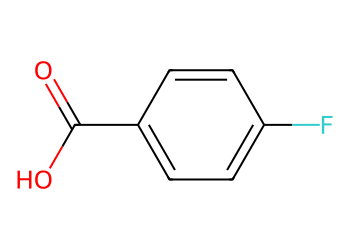

In [16]:
from rdkit import Chem
from rdkit.Chem import Draw

qry = Chem.MolFromSmiles("Cl")     # what to find
rep = Chem.MolFromSmiles("F")      # what to place
mol = Chem.MolFromSmiles("Clc1ccc(cc1)C(=O)O")

out = Chem.ReplaceSubstructs(mol, qry, rep, replaceAll=True)[0]
Draw.MolToImage(out, size=(350, 250))

### 3.2 Neutralize a carboxylate

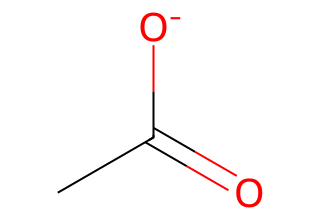

In [17]:
mol = Chem.MolFromSmiles("CC(=O)[O-]")
find = Chem.MolFromSmiles("[O-]")  # anionic oxygen as a molecule
put  = Chem.MolFromSmiles("O")
mol_neutral = Chem.ReplaceSubstructs(mol, find, put, replaceAll=True)[0]
Draw.MolToImage(mol_neutral, size=(320, 220))

### 3.3 Add a methyl group with a graph edit

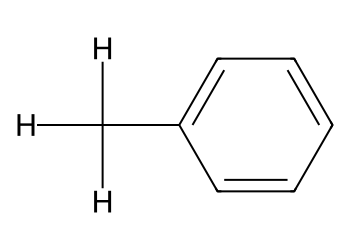

In [18]:
mol = Chem.MolFromSmiles("c1ccccc1")  # benzene
em = Chem.EditableMol(mol)

idx_C = em.AddAtom(Chem.Atom("C"))
idx_H1 = em.AddAtom(Chem.Atom("H"))
idx_H2 = em.AddAtom(Chem.Atom("H"))
idx_H3 = em.AddAtom(Chem.Atom("H"))

em.AddBond(2, idx_C, order=Chem.BondType.SINGLE)  # attach at atom index 2
em.AddBond(idx_C, idx_H1, order=Chem.BondType.SINGLE)
em.AddBond(idx_C, idx_H2, order=Chem.BondType.SINGLE)
em.AddBond(idx_C, idx_H3, order=Chem.BondType.SINGLE)

mol2 = em.GetMol()
Chem.SanitizeMol(mol2)
Draw.MolToImage(mol2, size=(350, 250), includeAtomNumbers=True)

```{admonition} Tip
After graph edits, call `Chem.SanitizeMol` to check valence and aromaticity.
```

---

## 3.4 Why use `EditableMol` instead of just SMILES edits?

Text edits to SMILES can hit the wrong atom or make an invalid string. `EditableMol` lets you target an atom index, keep valence correct, and apply the same change across many molecules in a repeatable way.

Now consider below example:
**add a methyl group to atom index 2 across 7 inputs**

In [19]:
smiles_list = [  
    "c1ccccc1",            # benzene
    "Oc1ccccc1",           # phenol
    "Nc1ccccc1",           # aniline
    "Clc1ccccc1",          # chlorobenzene
    "c1ccncc1",            # pyridine
    "O=C(O)c1ccccc1",      # benzoic acid
    "OCCc1ccccc1",         # benzyl alcohol
]  

In [20]:
def add_methyl(smi):  
    mol = Chem.MolFromSmiles(smi)  # parse SMILES to molecule
    if mol is None or mol.GetNumAtoms() < 3:  # quick guard for bad/short inputs
        return None  # signal failure
    em = Chem.EditableMol(mol)  # enter editable graph mode
    c_idx = em.AddAtom(Chem.Atom("C"))  # add the methyl carbon
    for _ in range(3):  # add three hydrogens
        h = em.AddAtom(Chem.Atom("H"))  # create a hydrogen atom
        em.AddBond(c_idx, h, Chem.BondType.SINGLE)  # connect H to C
    em.AddBond(2, c_idx, Chem.BondType.SINGLE)  # attach methyl C to atom index 2
    newmol = em.GetMol()  # exit edit mode
    Chem.SanitizeMol(newmol)  # check valence/aromaticity
    return newmol  # return edited molecule

In [21]:
for smi in smiles_list:  # iterate over the 7 SMILES
    mol2 = add_methyl(smi)  # attempt the methyl add
    out = Chem.MolToSmiles(mol2) if mol2 else "failed"  # convert to output SMILES or flag
    print("IN :", smi)  # show input
    print("---------------------")  
    print("OUT:", out)  # show output
    print("---------------------")

IN : c1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1
---------------------
IN : Oc1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1O
---------------------
IN : Nc1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1N
---------------------
IN : Clc1ccccc1
---------------------
OUT: [H]C([H])([H])c1ccccc1Cl
---------------------
IN : c1ccncc1
---------------------
OUT: [H]C([H])([H])c1ccccn1
---------------------
IN : O=C(O)c1ccccc1
---------------------
OUT: [H]C([H])([H])OC(=O)c1ccccc1
---------------------
IN : OCCc1ccccc1
---------------------
OUT: [H]C([H])([H])C(CO)c1ccccc1
---------------------


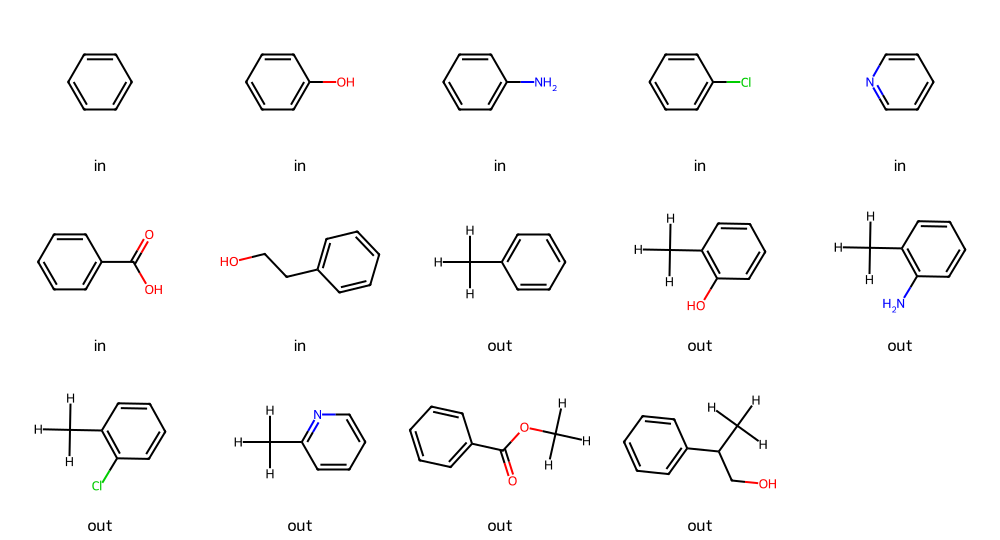

In [22]:
mols_in  = [Chem.MolFromSmiles(s) for s in smiles_list]  # make inputs as mols
mols_out = [add_methyl(s) for s in smiles_list]  # make edited outputs

Draw.MolsToGridImage(  # draw a grid to compare
    mols_in + mols_out,  # originals then edits
    molsPerRow=5,  # how many per row
    subImgSize=(200,180),  # image size
    legends=["in"]*len(mols_in)+["out"]*len(mols_out),  # labels
    useSVG=True  # SVG for crisp display
)  # end drawing

---



## 4. PubChem and URL


```note
Goal: given a common name or a PubChem CID, get a SMILES string you can feed into RDKit.
```

### 4.1 Install and imports

In [23]:
# Install requests if you do not have it
try:
    import requests
except Exception:
    %pip -q install requests
    import requests

from urllib.parse import quote_plus  

Instead of going to [PubChem’s main site](https://pubchem.ncbi.nlm.nih.gov) and manually searching for a compound, we can also use a **direct URL** to query PubChem’s REST API. This allows us to send structured requests and retrieve data in machine-readable formats such as JSON, XML, or plain text. 

The figure below illustrates the general workflow of PUG-REST: provide an input (like a compound name), choose an operation (for example, retrieving a CID), and specify the output format. Using URLs in this way not only automates lookups but also integrates PubChem data smoothly into code and analysis.




![PubChem PUG-REST Figure](https://iupac.github.io/WFChemCookbook/_images/pubchem_pugrest_fig1.jpg)

Here are some example URLs you can click and explore directly in a browser:
- [https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/cids/JSON](https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/cids/JSON): Returns the PubChem Compound ID (CID) for aspirin.
- [https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/IUPACName/JSON](https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/IUPACName/JSON): Returns the standardized IUPAC name.
- [https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/CanonicalSMILES/JSON](https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/CanonicalSMILES/JSON): Returns the canonical SMILES string representation.


```{note}
The key idea is that PubChem is not only a website but also a programmatic data service. A well-formed URL acts like a query to their database.
```

If you are interested in learning more about PubChem URL, please read:
- [IUPAC FAIR Chemistry Cookbook guide](https://iupac.github.io/WFChemCookbook/datasources/pubchem_pugrest1.html)


---

### 4.2 Resolve a **name** to a CID

In [24]:
import requests
from urllib.parse import quote_plus

name = "acetaminophen"

# Step 1: resolve the name to one or more PubChem CIDs
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{quote_plus(name)}/cids/JSON"
print("URL:", url)  # helps debug if you get HTTP 400

r = requests.get(url, timeout=30)
r.raise_for_status()
data = r.json()

cid_list = data.get("IdentifierList", {}).get("CID", [])
if not cid_list:
    raise ValueError(f"No CID found for {name}")

cid = cid_list[0]  # take the first hit
print("CID:", cid)

URL: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/acetaminophen/cids/JSON


CID: 1983


```{note}
CID is PubChem’s numeric identifier for a molecule. Taking the first hit is simple and works well for common drugs.
Try to copy and paste the output URL from above copy to your browser and hit enter to see what it looks like!
```
Essentially, we first get the JSON format from the URL

In [25]:
r = requests.get(url, timeout=30)
data = r.json()
data

{'IdentifierList': {'CID': [1983]}}

Then we use `data.get()` to search for `"IdentifierList"`

In [26]:
print(data.get("IdentifierList", {}))

{'CID': [1983]}


---

### 4.3 Get properties from the CID

#### 4.3.1 Get the **IUPAC name**

In [27]:
fields = "IUPACName"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/{fields}/JSON"
print("URL:", url)

r = requests.get(url, timeout=30)
r.raise_for_status()
data = r.json()

props = data["PropertyTable"]["Properties"][0]
print("IUPAC:", props.get("IUPACName"))

URL: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/1983/property/IUPACName/JSON


IUPAC: N-(4-hydroxyphenyl)acetamide


```{note}
The IUPAC name is the standardized systematic name for the compound, defined by the International Union of Pure and Applied Chemistry.
```

Let's break it down again:

In [28]:
data["PropertyTable"]

{'Properties': [{'CID': 1983, 'IUPACName': 'N-(4-hydroxyphenyl)acetamide'}]}

In [29]:
data["PropertyTable"]["Properties"]

[{'CID': 1983, 'IUPACName': 'N-(4-hydroxyphenyl)acetamide'}]

In [30]:
data["PropertyTable"]["Properties"][0]

{'CID': 1983, 'IUPACName': 'N-(4-hydroxyphenyl)acetamide'}

---

#### 4.3.2 Get the **Canonical SMILES**

Now, we can even condense everything within one line:

In [31]:
print("Canonical SMILES:", requests.get(f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/TXT").text.strip())

Canonical SMILES: CC(=O)NC1=CC=C(C=C1)O


```{note}
Canonical SMILES is a normalized form of the molecule's SMILES string.  
It provides a unique representation but does not retain stereochemistry.
```

---

#### 4.3.3 Get the **Isomeric SMILES**
Similar:

In [32]:
print("Isomeric SMILES:", requests.get(f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/IsomericSMILES/TXT").text.strip())

Isomeric SMILES: CC(=O)NC1=CC=C(C=C1)O


```{note}
Isomeric SMILES includes stereochemistry and isotopic information if PubChem has it.  
This is useful for distinguishing molecules that have the same atoms but different spatial arrangements.
```

---

### 4.4 Make it safe: minimal error handling

In [33]:
import requests  # HTTP client
from urllib.parse import quote_plus  # safe URL encoding

def safe_get_json(url, timeout=30):  # fetch JSON safely
    r = requests.get(url, timeout=timeout)  # send request
    r.raise_for_status()  # raise if HTTP error
    return r.json()  # parse and return JSON

def safe_get_text(url, timeout=30):  # fetch plain text safely
    r = requests.get(url, timeout=timeout)  # send request
    r.raise_for_status()  # raise if HTTP error
    return r.text  # return raw text

```note
If you see HTTP 400, print the URL and check if the name was encoded.  
Timeouts keep notebooks from hanging.
```

---

## 4.5 Function: by **name**

In [34]:
def pubchem_smiles_by_name(name, isomeric=True):  # look up by common name
    nm = str(name).strip()  # clean input
    if not nm:  # empty string check
        raise ValueError("Empty name")  # clear message
    enc = quote_plus(nm)  # URL encode the name
    kind = "IsomericSMILES" if isomeric else "CanonicalSMILES"  # choose field
    # get SMILES as plain text
    smi_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{enc}/property/{kind}/TXT"  # TXT endpoint
    smiles = safe_get_text(smi_url).strip()  # fetch and strip whitespace
    # get CID via JSON
    cid_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{enc}/cids/JSON"  # CID list
    cid_list = safe_get_json(cid_url).get("IdentifierList", {}).get("CID", [])  # pick from JSON
    if not cid_list:  # handle no hits
        raise ValueError(f"No CID found for name: {nm}")  # message
    cid = int(cid_list[0])  # first hit
    # get IUPAC name as text
    iupac_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/IUPACName/TXT"  # TXT endpoint
    iupac = safe_get_text(iupac_url).strip()  # fetch IUPAC
    return {"name": nm, "cid": cid, "smiles": smiles, "iupac": iupac}  # result dict

**Example**

In [35]:
pubchem_smiles_by_name("ibuprofen")  # quick demo

{'name': 'ibuprofen',
 'cid': 3672,
 'smiles': 'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O',
 'iupac': '2-[4-(2-methylpropyl)phenyl]propanoic acid'}

---

## 4.6 Function: by **CID**

In [36]:
def pubchem_smiles_by_cid(cid, isomeric=True):  # look up by CID
    try:
        cid_int = int(str(cid).strip())  # coerce to int
    except ValueError:
        raise ValueError(f"Bad CID: {cid}")  # clear message
    kind = "IsomericSMILES" if isomeric else "CanonicalSMILES"  # choose field
    smi_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid_int}/property/{kind}/TXT"  # TXT endpoint
    smiles = safe_get_text(smi_url).strip()  # fetch SMILES
    iupac_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid_int}/property/IUPACName/TXT"  # TXT endpoint
    iupac = safe_get_text(iupac_url).strip()  # fetch IUPAC
    return {"cid": cid_int, "smiles": smiles, "iupac": iupac}  # result dict

**Example**

In [37]:
pubchem_smiles_by_cid(2244)  # aspirin

{'cid': 2244,
 'smiles': 'CC(=O)OC1=CC=CC=C1C(=O)O',
 'iupac': '2-acetyloxybenzoic acid'}

---

## 4.7 Use with RDKit (short)

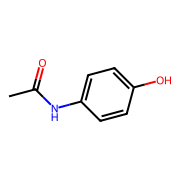

In [38]:
from rdkit import Chem  # RDKit core
from rdkit.Chem import Draw  # drawing

res = pubchem_smiles_by_name("acetaminophen")  # fetch SMILES by name
mol = Chem.MolFromSmiles(res["smiles"])  # make molecule
Draw.MolToImage(mol, size=(180, 180))  # draw image

```{note}
If `MolFromSmiles` gives `None`, print the SMILES string and check for copy issues.
```

---



## 5. Save and export

In [39]:
mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
print("canonical:", Chem.MolToSmiles(mol))
print("isomeric:", Chem.MolToSmiles(mol, isomericSmiles=True))

canonical: CC(=O)Oc1ccccc1C(=O)O
isomeric: CC(=O)Oc1ccccc1C(=O)O


In [40]:
# SDF with 2D coordinates
m = Chem.AddHs(mol)
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m)
w = Chem.SDWriter("molecule.sdf")
w.write(m); w.close()
"Saved molecule.sdf"

'Saved molecule.sdf'

In [41]:
# PNG depiction
img = Draw.MolToImage(mol, size=(400, 300))
img.save("molecule.png")
"Saved molecule.png"

'Saved molecule.png'

---

## 6. Quick reference

```{admonition} SMILES
- Atoms: upper case aliphatic, lower case aromatic
- Bonds: implicit single, =, #
- Branches: parentheses
- Rings: digits to open and close
- Charges: bracket the atom, e.g., [O-], [NH4+]
- Salts: separate parts with a dot
- E or Z: use slashes around the double bond
```

```{admonition} RDKit
- Parse: `Chem.MolFromSmiles`
- Draw: `Draw.MolToImage(..., includeAtomNumbers=True)`
- Hydrogens: `Chem.AddHs`
- Properties: `Descriptors.MolWt`, `Crippen.MolLogP`, `CalcNumHBA/HBD`, `CalcTPSA`
- Replace piece with piece: `Chem.ReplaceSubstructs(mol, findMol, repMol)`
- Salt split: `Chem.GetMolFrags(..., asMols=True)`
- Graph edit: `Chem.EditableMol`
- Save: `Chem.MolToSmiles`, `SDWriter`, PNG via `MolToImage(...).save(...)`
```

---

## 7. Glossary

```{glossary}
SMILES
  Text line notation for molecules. Example: ethanol is CCO.

aromatic
  Conjugated ring system represented with lower case atom symbols in SMILES, for example c1ccccc1.

CID
  PubChem Compound ID for a unique compound record.

sanitize
  RDKit process that checks valence, aromaticity, and stereochemistry.

descriptor
  Computed molecular property such as molecular weight or LogP.

EditableMol
  RDKit object that exposes low level atom and bond editing.
```

---

## 8. In-class activity

Each task mirrors the examples above. Fill in the `...` lines. Work in pairs. Solutions are in Section 9.

### 8.1 Read a SMILES and inspect

Given `smi = "O=C(O)c1ccccc1Cl"`.  
a) Draw with atom numbers.  
b) Count number of rings.  
c) Print the list of bonds with begin and end atom indices and bond orders.

```python
from rdkit import Chem
from rdkit.Chem import Draw

smi = ...  # TO DO

mol = Chem.MolFromSmiles(smi)
display(Draw.MolToImage(mol, size=(350, 250), includeAtomNumbers=True))

num_rings = ...   # TO DO: Chem.GetSSSR(mol)
print("rings:", num_rings)

for b in mol.GetBonds():
    print("bond", b.GetIdx(), b.GetBeginAtomIdx(), "-", b.GetEndAtomIdx(), "order", int(b.GetBondTypeAsDouble()))
```

---

### 8.2 Make a small properties table

Use names `["caffeine", "acetaminophen", "ibuprofen"]`. For each, fetch SMILES from PubChem, then compute MolWt, LogP, HBD, HBA, and TPSA.

```python
import pandas as pd
from rdkit.Chem import Descriptors, Crippen, rdMolDescriptors

names = ...  # TO DO
rows = []
for nm in names:
    info = ...  # TO DO: pubchem_smiles_by_name
    smi = info["smiles"]
    m = Chem.MolFromSmiles(smi)
    rows.append({
        "name": nm,
        "smiles": smi,
        "MolWt": ...,
        "LogP": ...,
        "HBD": ...,
        "HBA": ...,
        "TPSA": ...
    })

pd.DataFrame(rows)
```

---

### 8.3 Replace chlorine with fluorine

Replace Cl with F in `Clc1ccc(cc1)C(=O)O` and print the result SMILES.

```python
find = Chem.MolFromSmiles(... )  # TO DO
put  = Chem.MolFromSmiles(... )  # TO DO
mol  = ... # TO DO
out  = ... # TO DO
print(Chem.MolToSmiles(out))
```

---

### 8.4 Add a methyl group with a graph edit

Add a methyl at atom index 2 of benzene.

```python
mol = Chem.MolFromSmiles("c1ccccc1")
em = Chem.EditableMol(mol)
# TO DO: add code
Draw.MolToImage(..., size=(350, 250))
```

---

### 8.5 PubChem lookup to SMILES and drawing

We often get inputs in different formats. Some may be PubChem CIDs (just digits) while others are SMILES strings.

Tasks:
1) For each name in `["446157", "2244", "CCO", "482752", "c1ccccc1"]`
2) Print a line: `name: ... CID=... SMILES=...`.
3) Draw each molecule.


```python
    mixed = [...]

for ... in ...:
    if ...:  # looks like CID
      ...
    else: 
      ... 
    print(...)
    mol = Chem.MolFromSmiles(...)
    display(Draw.MolToImage(mol, size=(100, 100)))

```

```{note} Hint:
Try `isdigit()` to distinguish between cid-like input and SMILES
```
---